#### Kunal Kishore || 22810041

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
df = pd.read_csv("Life Expectancy Data.csv")
df.shape

(2938, 22)

In [3]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

### 1. Missing Value Treatment and outliers


In [4]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#Missing Value Treatment and Outliers:
df.fillna(method='ffill', inplace=True)  # Forward-fill missing values


In [7]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### 2. Explore the relationship between the Life expectancy variable and the response variables.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\Kunal\AppData\Local\Temp\ipykernel_19284\3938306625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


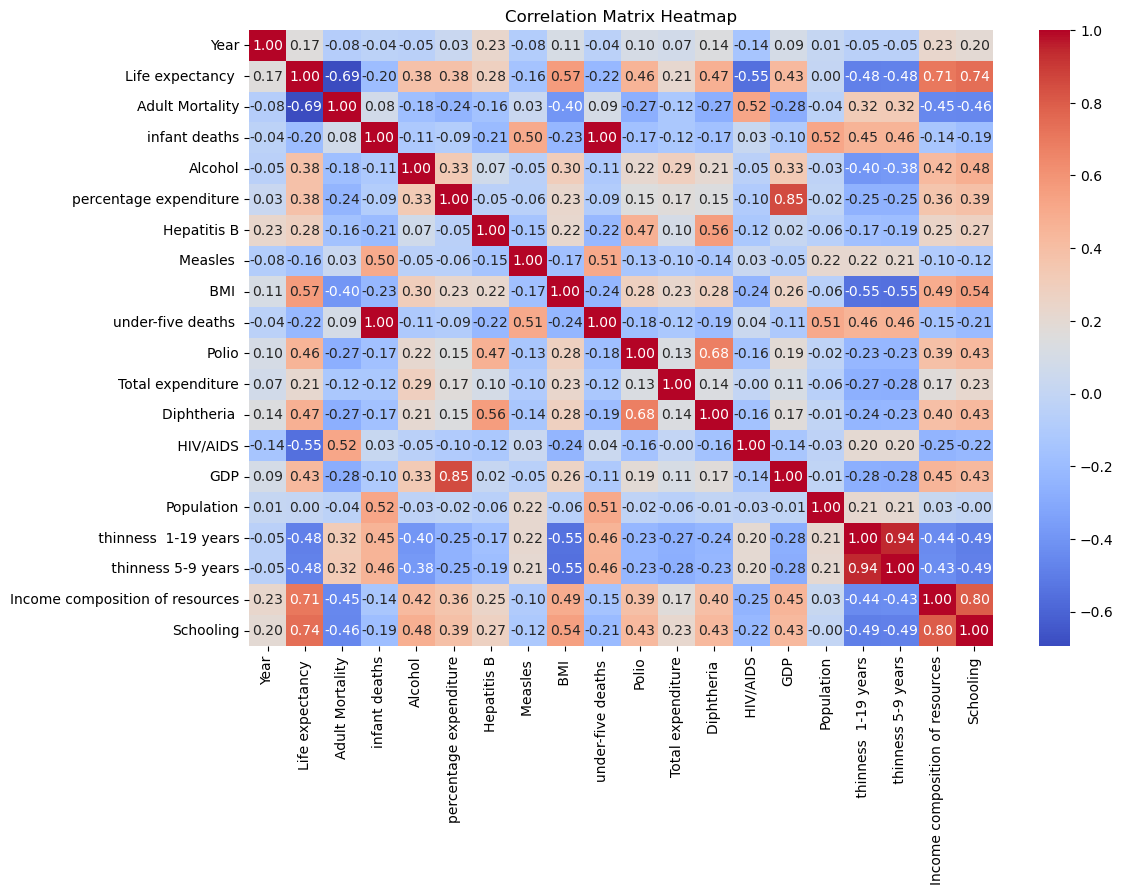

In [9]:
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [10]:
# Calculate the correlation of all features with 'Life expectancy'
correlation_with_life_expectancy = df.corr()['Life expectancy '].sort_values(ascending=False)

# Display the correlation values
print(correlation_with_life_expectancy)


Life expectancy                    1.000000
Schooling                          0.736323
Income composition of resources    0.705641
 BMI                               0.567361
Diphtheria                         0.470947
Polio                              0.456336
GDP                                0.429252
percentage expenditure             0.381847
Alcohol                            0.380721
Hepatitis B                        0.284345
Total expenditure                  0.212256
Year                               0.165457
Population                         0.003051
Measles                           -0.156446
infant deaths                     -0.195148
under-five deaths                 -0.221021
 thinness 5-9 years               -0.480438
 thinness  1-19 years             -0.484921
 HIV/AIDS                         -0.553770
Adult Mortality                   -0.694702
Name: Life expectancy , dtype: float64


C:\Users\Kunal\AppData\Local\Temp\ipykernel_19284\2181134297.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_life_expectancy = df.corr()['Life expectancy '].sort_values(ascending=False)


### 3. Feature selection

In [11]:
irrelevant_features = correlation_with_life_expectancy[correlation_with_life_expectancy < 0.1].index.tolist()

# Print the list of potentially irrelevant features
print("Potentially irrelevant features:")
print(irrelevant_features)


Potentially irrelevant features:
['Population', 'Measles ', 'infant deaths', 'under-five deaths ', ' thinness 5-9 years', ' thinness  1-19 years', ' HIV/AIDS', 'Adult Mortality']


In [12]:
data = df.drop(columns=irrelevant_features)


In [13]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
 BMI                               float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
GDP                                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [14]:
# Identify the data types of the features
numerical_features = data.select_dtypes(include=['int', 'float']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [15]:
# Group numerical features
numerical_data = data[numerical_features]
numerical_summary = numerical_data.describe()
print("Numerical Features Summary:")
print(numerical_summary)

Numerical Features Summary:
              Year  Life expectancy       Alcohol  percentage expenditure  \
count  2938.000000       2938.000000  2938.000000             2938.000000   
mean   2007.518720         69.195643     4.607270              738.251295   
std       4.613841          9.536654     4.044785             1987.914858   
min    2000.000000         36.300000     0.010000                0.000000   
25%    2004.000000         63.025000     0.880000                4.685343   
50%    2008.000000         72.000000     3.765000               64.912906   
75%    2012.000000         75.600000     7.665000              441.534144   
max    2015.000000         89.000000    17.870000            19479.911610   

       Hepatitis B         BMI         Polio  Total expenditure  Diphtheria   \
count  2938.000000  2938.000000  2938.000000        2938.000000  2938.000000   
mean     75.683799    38.020150    82.307692           5.905211    82.075221   
std      28.851806    20.175077    23.

In [16]:
# Group categorical features
categorical_data = data[categorical_features]
categorical_counts = categorical_data.nunique()
print("\nCategorical Features Counts:")
print(categorical_counts)


Categorical Features Counts:
Country    193
Status       2
dtype: int64


In [17]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [18]:
features_with_multiple_categories  = ['Country']

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Perform label encoding on each categorical feature
for feature in features_with_multiple_categories:
    data[feature] = encoder.fit_transform(categorical_data[feature])



features_with_Two_categories  = ['Status']

# Create an instance of LabelEncoder
encoder1 = OrdinalEncoder()

# Perform label encoding on each categorical feature
for feature in features_with_Two_categories:
    data[feature] = encoder.fit_transform(categorical_data[feature])



In [19]:
data.dtypes

Country                              int32
Year                                 int64
Status                               int32
Life expectancy                    float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
 BMI                               float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
GDP                                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### 4. Split the data in to train & test using sklearn


In [20]:
## Split training & testing data
x =  data.drop(columns=[data.columns[3]])
y =  data.iloc[:, 3:4].values



In [21]:
print(x)

      Country  Year  Status  Alcohol  percentage expenditure  Hepatitis B  \
0           0  2015       1     0.01               71.279624         65.0   
1           0  2014       1     0.01               73.523582         62.0   
2           0  2013       1     0.01               73.219243         64.0   
3           0  2012       1     0.01               78.184215         67.0   
4           0  2011       1     0.01                7.097109         68.0   
...       ...   ...     ...      ...                     ...          ...   
2933      192  2004       1     4.36                0.000000         68.0   
2934      192  2003       1     4.06                0.000000          7.0   
2935      192  2002       1     4.43                0.000000         73.0   
2936      192  2001       1     1.72                0.000000         76.0   
2937      192  2000       1     1.68                0.000000         79.0   

       BMI   Polio  Total expenditure  Diphtheria          GDP  \
0      19

In [22]:
print(y)

[[65. ]
 [59.9]
 [59.9]
 ...
 [44.8]
 [45.3]
 [46. ]]


In [23]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 5. Building model & performance (RMSE & R-squared (R2)) evaluation


In [24]:
# Running linear Regression on train data
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error (RMSE): {mse}')
print(f'R-squared (R2): {r2}')

Root Mean Squared Error (RMSE): 5.15500430623427
Mean Squared Error (RMSE): 26.57406939729386
R-squared (R2): 0.6934817398383539
